### Notes and References
None yet.




In [62]:

#@markdown ###First Cell 
#@markdown *Please paste this cell into any colab notebook for this project.* <br>
#@markdown ***
#@markdown **Contents**: Contents. <br>
#@markdown ***
#@markdown Major Edit History: 
#@markdown - Author, Date: Created as copy of Old Notebook (`Old Title`).
#@markdown ***
#@markdown <br> 
#@markdown Please change `FIELDDAY_DIR` if it is located differently in your drive. This cell will error if `FIELDDAY_DIR` is incorrect.
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Change working directory
import os
FIELDDAY_DIR = '/content/drive/My Drive/Field Day' #@param {type:"string"}
INCLUDE_DIR = '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils' #@param (type:"string")
PROJECT_DIR = os.path.join(FIELDDAY_DIR,'Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill')
JUPYTER_DIR = os.path.join(PROJECT_DIR,'Colab/')
os.chdir(JUPYTER_DIR)
print(f'---\nCWD: {os.getcwd()}')

#@markdown Change pandas `max_rows` and `max_columns`
import pandas as pd
pd.options.display.max_columns = 100 #@param {type:"integer"}
#pd.options.display.max_columns = 1000
pd.options.display.max_rows = 60 #@param {type:"integer"}

#@markdown *Note: There may be other variables to manually change. Look the "Set Variables" section.*

# import utils
import sys
sys.path.append(INCLUDE_DIR)
#sys.path.append('.')
import utils

Mounted at /content/drive
---
CWD: /content/drive/My Drive/Field Day/Research and Writing Projects/2019 Using Jo Wilder to Predict English Language Skill/Colab


### Imports

In [63]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import jowilder_utils as jw_util
import feature_utils as feat_util
import urllib.request
from google.colab import files
from io import BytesIO
from math import ceil
from matplotlib import pyplot as plt
from scipy import stats
from Workflow import Workflow
from zipfile import ZipFile
import importlib
importlib.reload(feat_util)
importlib.reload(jw_util)

<module 'jowilder_utils' from '/content/drive/My Drive/Field Day/Research and Writing Projects/OGDUtils/jowilder_utils.py'>

## Import CSV

In [67]:
csv_reldir = "Output Data" #@param {type:"string"}
csv_fname = "JM_202006101204_all_woutNaN.csv" #@param {type:"string"}
csv_path = os.path.join(csv_reldir, csv_fname)
print('Open from:', csv_path)
print('Other files in dir:', ''.join([
        f'\n{f}' for f in os.listdir(csv_reldir) if f.endswith('sv')]))

Open from: Output Data/JM_202006101204_all_woutNaN.csv
Other files in dir: 
JM_202006041215_filtered_obj_feats.csv
JM_202006080931_filtered_obj_feats.csv
JM_202006090933_filtered_obj_feats.csv
JM_202006080931_filtered_obj_feats_selected_for_R0.csv
JM_202006080931_filtered_obj_feats_selected_for_R1.csv
JM_202006080931_filtered_obj_feats_selected_for_R2.csv
JM_202006101044_filtered_obj_feats.csv
JM_202006101052_with_nans.csv
JM_202006101204_throughAss2_wNaN.csv
JM_202006101204_all_wNaN.csv
JM_202006101204_all_woutNaN.csv


In [68]:
df = pd.read_csv(csv_path, comment='#', index_col=0)
df.describe()

,Q0_A1_time,Q0_A2_time,Q0_A3_time,Q0_num_guesses,Q10_A1_time,Q10_A2_time,Q10_A3_time,Q10_num_guesses,Q11_A1_time,Q11_A2_time,Q11_A3_time,Q11_num_guesses,Q12_A1_time,Q12_A2_time,Q12_A3_time,Q12_num_guesses,Q13_A1_time,Q13_A2_time,Q13_A3_time,Q13_num_guesses,Q14_A1_time,Q14_A2_time,Q14_A3_time,Q14_num_guesses,Q15_A1_time,Q15_A2_time,Q15_A3_time,Q15_num_guesses,Q16_A1_time,Q16_A2_time,Q16_A3_time,Q16_num_guesses,Q17_A1_time,Q17_A2_time,Q17_A3_time,Q17_num_guesses,Q18_A1_time,Q18_A2_time,Q18_A3_time,Q18_num_guesses,Q1_A1_time,Q1_A2_time,Q1_A3_time,Q1_num_guesses,Q2_A1_time,Q2_A2_time,Q2_A3_time,Q2_num_guesses,Q3_A1_time,Q3_A2_time,...,Q16_A3_?,Q16_A3_D,Q16_A3_P,Q16_A3_Q,Q16_A3_R,Q16_A3_S,Q16_A3_X,Q16_A3_Y,Q16_A3_Z,Q16_A3_a,Q16_A3_b,Q16_A3_c,Q16_A3_d,Q16_A3_e,Q16_A3_f,Q17_A3_B,Q17_A3_K,Q17_A3_L,Q17_A3_O,Q17_A3_Q,Q17_A3_R,Q17_A3_V,Q17_A3_W,Q17_A3_X,Q17_A3_Y,Q17_A3_Z,Q17_A3_a,Q17_A3_b,Q17_A3_c,Q17_A3_d,Q17_A3_e,Q17_A3_f,Q18_A3_C,Q18_A3_G,Q18_A3_L,Q18_A3_M,Q18_A3_O,Q18_A3_P,Q18_A3_R,Q18_A3_V,Q18_A3_W,Q18_A3_X,Q18_A3_Y,Q18_A3_Z,Q18_A3_a,Q18_A3_b,Q18_A3_c,Q18_A3_d,Q18_A3_e,Q18_A3_f
count,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,...,28105.000000,28105.0,28105.000000,28105.0,28105.0,28105.0,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.0,28105.000000,28105.0,28105.0,28105.000000,28105.0,28105.0,28105.0,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.0,28105.000000,28105.0,28105.0,28105.000000,28105.0,28105.0,28105.0,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000
mean,4.772355,1.651997,0.882408,0.992243,2.289650,1.150922,0.799728,1.169650,1.332544,0.737244,0.549927,0.798399,1.565045,0.314952,0.143421,0.363494,2.619215,2.046532,0.862319,1.865149,2.374678,0.252526,0.100291,0.270272,1.152084,0.361280,0.187762,0.420281,0.736134,0.154954,0.122404,0.233446,0.649215,0.228942,0.049557,0.286533,0.529497,0.027484,0.022273,0.165273,3.360555,0.213955,0.046222,0.562569,0.854677,0.111361,0.040589,0.191603,2.319751,0.358132,...,0.000569,0.0,0.000036,0.0,0.0,0.0,0.000463,0.000569,0.000178,0.000249,0.000783,0.000747,0.011777,0.001850,0.004732,0.0,0.000036,0.0,0.0,0.000142,0.0,0.0,0.0,0.000463,0.000498,0.000071,0.000142,0.000356,0.000427,0.000676,0.004092,0.001281,0.0,0.000036,0.0,0.0,0.000036,0.0,0.0,0.0,0.000036,0.000356,0.000534,0.000285,0.000463,0.000498,0.000178,0.000249,0.000036,0.000890
std,10.249174,8.710843,6.624028,1.419967,6.970967,5.513395,3.349065,3.893477,3.367351,7.780019,4.188488,2.926839,5.875128,5.003684,1.703172,1.078616,8.455268,9.861932,4.921762,6.509160,8.712912,2.566441,0.869544,1.139454,7.230192,1.838215,1.173544,1.932037,5.205292,1.018151,1.749095,0.928932,3.243228,2.053251,1.070960,2.426089,1.751361,0.510541,0.594474,0.724488,7.498884,2.627516,0.870620,0.621234,5.436200,1.455045,0.861144,0.573802,5.346643,2.142909,...,0.023854,0.0,0.005965,0.0,0.0,0.0,0.021502,0.023854,0.013337,0.015780,0.027968,0.027325,0.107884,0.042975,0.068630,0.0,0.005965,0.0,0.0,0.011929,0.0,0.0,0.0,0.021502,0.022314,0.008436,0.011929,0.018860,0.020659,0.025992,0.063837,0.035768,0.0,0.005965,0.0,0.0,0.005965,0.0,0.0,0.0,0.005965,0.018860,0.023096,0.016869,0.021502,0.022314,0.013337,0.015780,0.005965,0.029812
min,0.000000,0.000000,0

# Detect optimal features

Generate Models:

In [69]:
# first, drop non-numeric columns.
numeric_df = df.select_dtypes(include='number')
print(f"Ignoring non-numeric features, reduces from {len(df.columns)} to {len(numeric_df.columns)} features.")
# print(f"number of starting columns: {len(feat_detect_data.columns)}")

# next, drop outcome columns (i.e. survey responses).
drops = ['R0_quiz_response', 'R1_quiz_response', 'R1_quiz_response_bin', 'R2_quiz_response', 'R2_quiz_response_bin']
## To remove any other classes of features, uncomment the appropriate line below.
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("int")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("lvl")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("obj")]
# drops += [elem for elem in feat_detect_data.columns if elem.startswith("Q")]
feat_detect_data = numeric_df.drop(drops, axis=1)
print(f"dropping features: {drops}, reduces from {len(numeric_df.columns)} to {len(feat_detect_data.columns)} features.")

predict_R0 = df.loc[:, 'R0_quiz_response']
predict_R1 = df.loc[:, 'R1_quiz_response_bin']
predict_R2 = df.loc[:, 'R2_quiz_response_bin']

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC

# pre_test_model_R0 = Lasso(alpha=1, max_iter=2000)
# pre_test_model_R1 = Lasso(alpha=1, max_iter=2000)
# pre_test_model_R2 = Lasso(alpha=1, max_iter=2000)
C_val = 0.0001
pre_test_model_R0 = LinearSVC(penalty='l1', C=C_val, dual=False)
pre_test_model_R1 = LinearSVC(penalty='l1', C=C_val, dual=False)
pre_test_model_R2 = LinearSVC(penalty='l1', C=C_val, dual=False)
pre_test_results_R0 = pre_test_model_R0.fit(feat_detect_data, predict_R0)
pre_test_results_R1 = pre_test_model_R1.fit(feat_detect_data, predict_R1)
pre_test_results_R2 = pre_test_model_R2.fit(feat_detect_data, predict_R2)

# selector_R0 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R0)
# selector_R1 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R1)
# selector_R2 = SelectFromModel(Lasso(alpha=1, max_iter=2000)).fit(feat_detect_data, predict_R2)

# selector_R0 = SelectFromModel(LinearSVC(penalty='l1', C=C_val, dual=False)).fit(feat_detect_data, predict_R0)
# selector_R1 = SelectFromModel(LinearSVC(penalty='l1', C=C_val, dual=False)).fit(feat_detect_data, predict_R1)
# selector_R2 = SelectFromModel(LinearSVC(penalty='l1', C=C_val, dual=False)).fit(feat_detect_data, predict_R2)
selector_R0 = SelectFromModel(pre_test_results_R0, prefit=True)
selector_R1 = SelectFromModel(pre_test_results_R1, prefit=True)
selector_R2 = SelectFromModel(pre_test_results_R2, prefit=True)
print(f"Finished running models with C={C_val}")

Ignoring non-numeric features, reduces from 4058 to 4039 features.
dropping features: ['R0_quiz_response', 'R1_quiz_response', 'R1_quiz_response_bin', 'R2_quiz_response', 'R2_quiz_response_bin'], reduces from 4039 to 4034 features.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Finished running models with C=0.0001


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Calculate importance values, and count selected features:

In [72]:
pre_test_results = [pre_test_results_R0, pre_test_results_R1, pre_test_results_R2]
raw_importances = [np.abs(results.coef_[0]) for results in pre_test_results]
for i in range(len(pre_test_results)):
  next_R = raw_importances[i]
  print(f"greatest importance R{i}: {max(next_R)}")

selectors = [selector_R0, selector_R1, selector_R2]
feature_indices_by_selector = [selector.get_support(indices=True) for selector in selectors]
features_by_selector = [feat_detect_data.columns[indices] for indices in feature_indices_by_selector]
importances_by_selector = [raw_importances[i][feature_indices_by_selector[i]] for i in range(len(selectors))]
# importances_by_selector = [[1.0]*len(features_by_selector[i]) for i in range(len(selectors))]

for i in range(len(selectors)):
  print(f"Number of features for predicting R{i}_quiz_response: {len(feature_indices[i])}")
  
# *** Handle Common Features ***
# simple lambda expression to check whether an element is in all lists from a list of lists
in_index_sets = lambda elem, index_sets : sum([1 if elem in index_set else 0 for index_set in index_sets]) == len(index_sets)
common_feature_indices = [i for i in feature_indices_by_selector[0] if in_index_sets(i, feature_indices_by_selector[1:])]
print(f"Number of common features: {len(common_feature_indices)}")

greatest importance R0: 0.0007085291700251857
greatest importance R1: 0.003201696030009681
greatest importance R2: 0.0006598161894379695
Number of features for predicting R0_quiz_response: 145
Number of features for predicting R1_quiz_response: 314
Number of features for predicting R2_quiz_response: 376
Number of common features: 47


Set up chart functions:

In [73]:
CHART_SIZE_FACTOR = 10 #@param {type:"integer"}
def FeatureSuggestionPlot(features, importances, title):
  fig = plt.figure(figsize=[6.4, len(importances)*(CHART_SIZE_FACTOR/10)/4])
  ax = fig.subplots()
  y_pos = np.arange(len(features))
  ax.barh(y_pos, importances, align='center')
  ax.set_yticks(y_pos)
  ax.set_yticklabels(features)
  ax.set_xlabel("Importance")
  ax.set_title(title)
  fig.show()
print("Complete")

Complete


**Feature Suggestions List**:

Greatest average importance for common features: 0.00023988419590381522


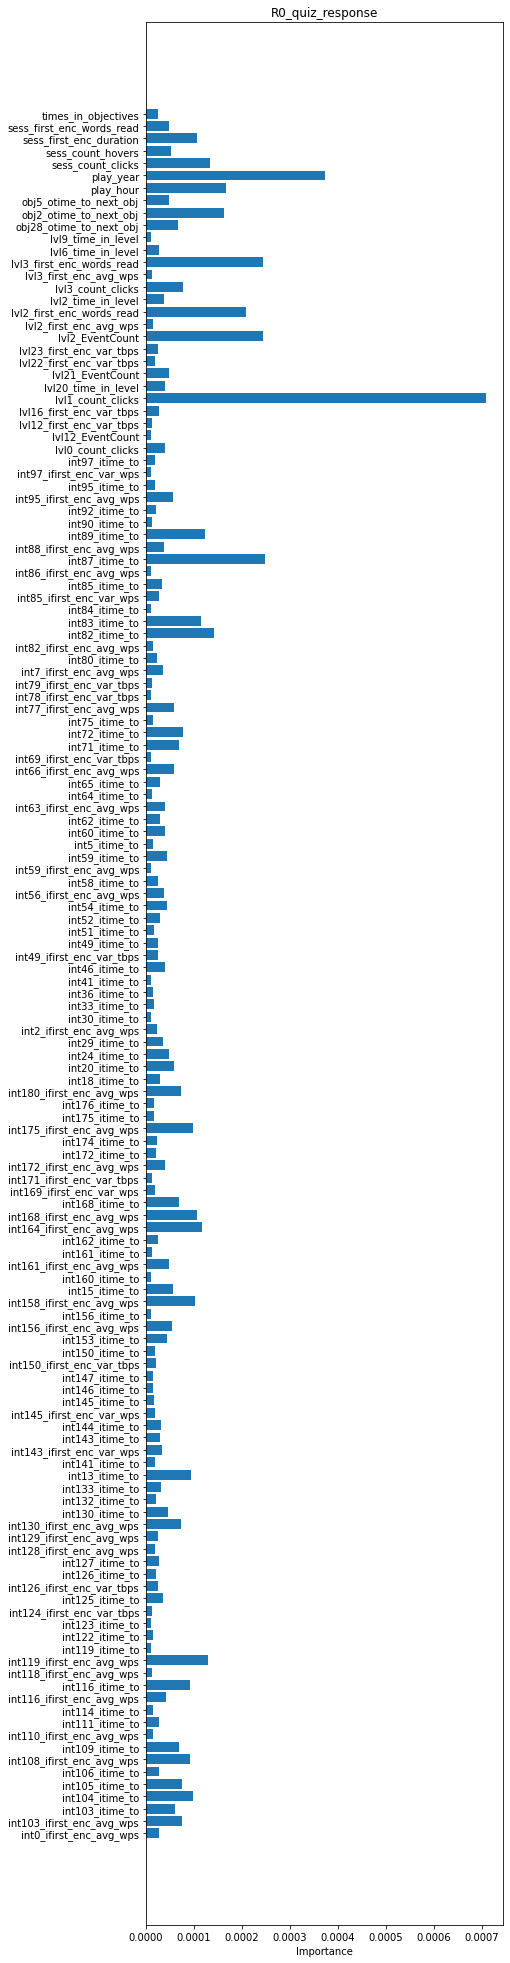

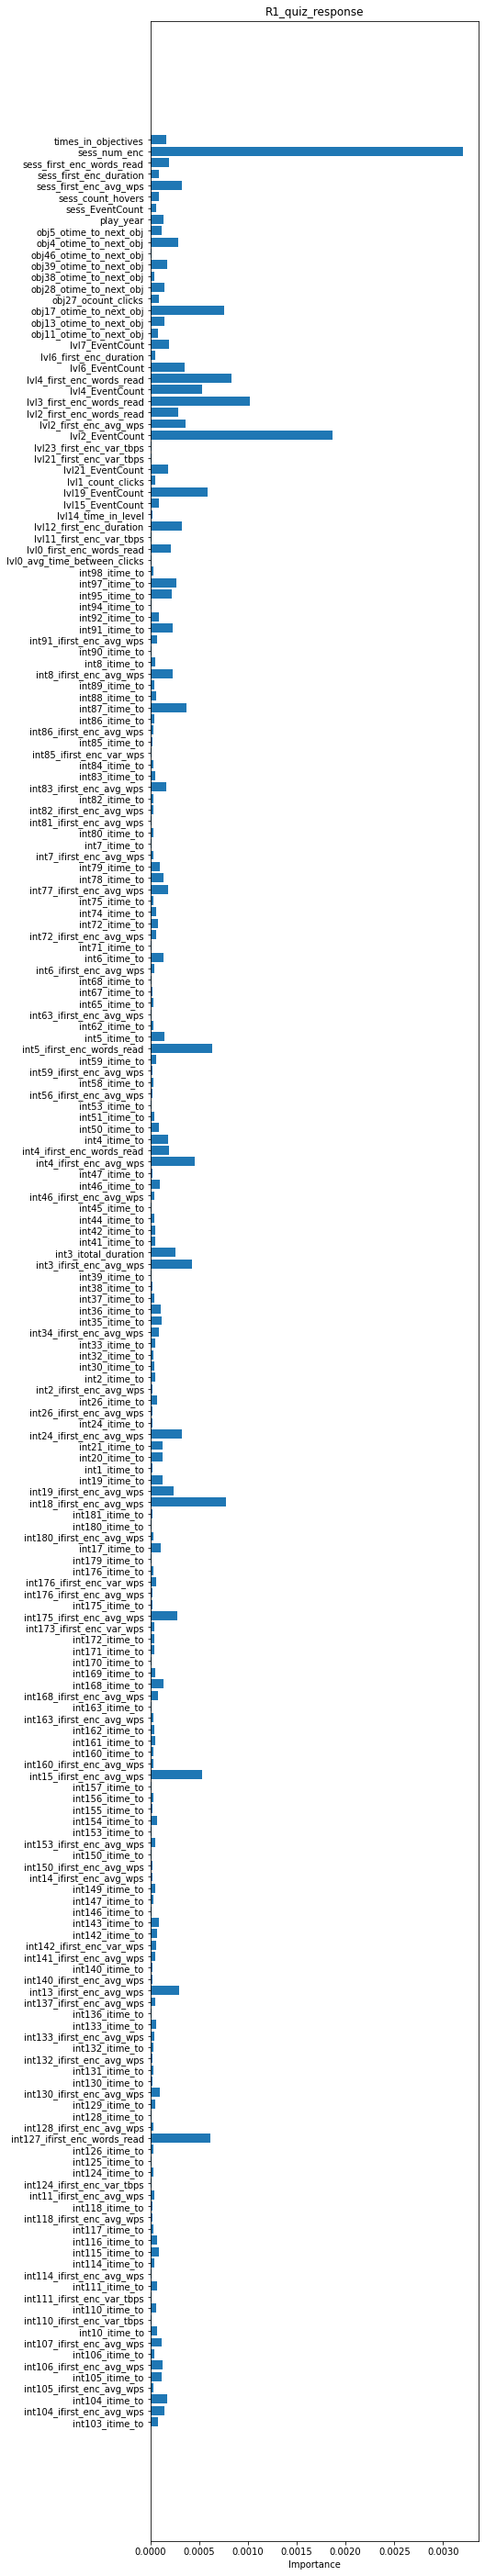

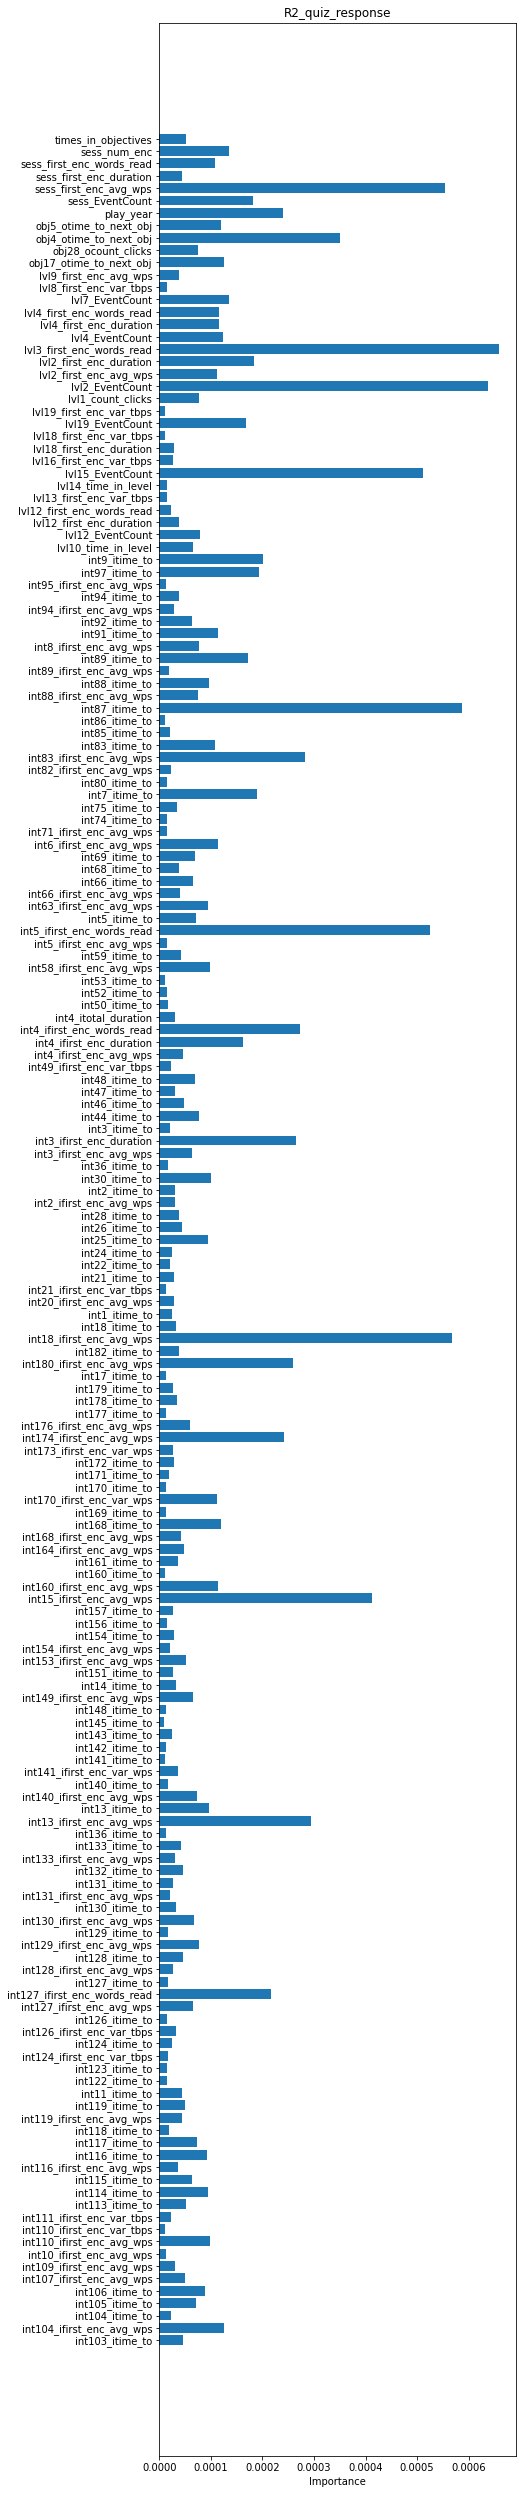

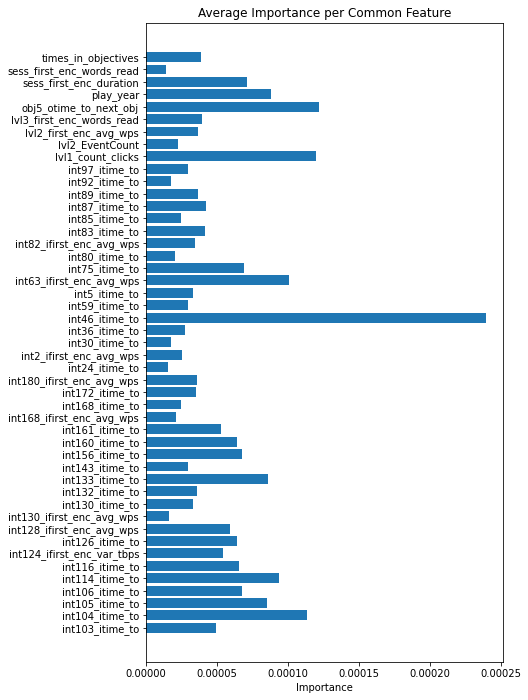

In [75]:
# Now that we've got a bunch of lists ready, we just use them to make graphs
for i in range(len(selectors)):
  FeatureSuggestionPlot(features_by_selector[i], importances_by_selector[i], title=f"R{i}_quiz_response")
  # FeatureSuggestionPlot(features_by_selector[i], [1.0]*len(features_by_selector[i]), title=f"R{i}_quiz_response")

if len(common_feature_indices) > 0:
  common_features = feat_detect_data.columns[common_feature_indices]
  common_importances = [[importances_by_selector[j][i] for j in range(len(selectors))] for i in range(len(common_features)) ]
  mean = lambda vals : sum(vals) / len(vals)
  average_common_importances = [mean(importance_list) for importance_list in common_importances]
  # average_common_importances = [1.0]*len(common_features)
  print(f"Greatest average importance for common features: {max(average_common_importances)}")
  FeatureSuggestionPlot(common_features, average_common_importances, title=f"Average Importance per Common Feature")

### Select final features

In [0]:
# feat_util.get_range_feats_and_range(level_features_widget)

In [0]:
# if options:# and options.lvlfeats is not None and options.lvlrange is not None: 
#     aggregate_df, aggregate_meta = feat_util.describe_lvl_feats(df, options.lvlfeats, options.lvlrange)
# else:
#     range_feats_and_range = feat_util.get_range_feats_and_range(level_features_widget)
#     aggregate_df, aggregate_meta = feat_util.des(range_feats_and_range, feat_util.jw_cc_max)
# # if not options:# and options.finalfeats is not None:
#     final_features_widget = feat_util.get_feat_selection(aggregate_df, session_prefix="sess", max_lvl=23, cc_prefix_max_list=feat_util.jw_cc_max)
#     display(final_features_widget)
# print(*aggregate_meta,sep='\n')

### Output final columns

In [76]:
# if options: #None not in [options, options.finalfeats]:
#     reduced_df, reduced_meta = feat_util.reduce_feats(aggregate_df, options.finalfeats)
# else:
#     final_feats = feat_util.get_selected_feature_list(final_features_widget, session_prefix="sess")
#     reduced_df, reduced_meta = feat_util.reduce_feats(aggregate_df, final_feats)
reduced_dfs_by_selector = [feat_detect_data[feature_set] for feature_set in features_by_selector]
reduced_metas = [[] for i in range(len(selectors))]
print(*reduced_metas, sep='\n')
# take a quick look at the first set of selected features
reduced_dfs_by_selector[0]

[]
[]
[]


,int0_ifirst_enc_avg_wps,int103_ifirst_enc_avg_wps,int103_itime_to,int104_itime_to,int105_itime_to,int106_itime_to,int108_ifirst_enc_avg_wps,int109_itime_to,int110_ifirst_enc_avg_wps,int111_itime_to,int114_itime_to,int116_ifirst_enc_avg_wps,int116_itime_to,int118_ifirst_enc_avg_wps,int119_ifirst_enc_avg_wps,int119_itime_to,int122_itime_to,int123_itime_to,int124_ifirst_enc_var_tbps,int125_itime_to,int126_ifirst_enc_var_tbps,int126_itime_to,int127_itime_to,int128_ifirst_enc_avg_wps,int129_ifirst_enc_avg_wps,int130_ifirst_enc_avg_wps,int130_itime_to,int132_itime_to,int133_itime_to,int13_itime_to,int141_itime_to,int143_ifirst_enc_var_wps,int143_itime_to,int144_itime_to,int145_ifirst_enc_var_wps,int145_itime_to,int146_itime_to,int147_itime_to,int150_ifirst_enc_var_tbps,int150_itime_to,int153_itime_to,int156_ifirst_enc_avg_wps,int156_itime_to,int158_ifirst_enc_avg_wps,int15_itime_to,int160_itime_to,int161_ifirst_enc_avg_wps,int161_itime_to,int162_itime_to,int164_ifirst_enc_avg_wps,...,int75_itime_to,int77_ifirst_enc_avg_wps,int78_ifirst_enc_var_tbps,int79_ifirst_enc_var_tbps,int7_ifirst_enc_avg_wps,int80_itime_to,int82_ifirst_enc_avg_wps,int82_itime_to,int83_itime_to,int84_itime_to,int85_ifirst_enc_var_wps,int85_itime_to,int86_ifirst_enc_avg_wps,int87_itime_to,int88_ifirst_enc_avg_wps,int89_itime_to,int90_itime_to,int92_itime_to,int95_ifirst_enc_avg_wps,int95_itime_to,int97_ifirst_enc_var_wps,int97_itime_to,lvl0_count_clicks,lvl12_EventCount,lvl12_first_enc_var_tbps,lvl16_first_enc_var_tbps,lvl1_count_clicks,lvl20_time_in_level,lvl21_EventCount,lvl22_first_enc_var_tbps,lvl23_first_enc_var_tbps,lvl2_EventCount,lvl2_first_enc_avg_wps,lvl2_first_enc_words_read,lvl2_time_in_level,lvl3_count_clicks,lvl3_first_enc_avg_wps,lvl3_first_enc_words_read,lvl6_time_in_level,lvl9_time_in_level,obj28_otime_to_next_obj,obj2_otime_to_next_obj,obj5_otime_to_next_obj,play_hour,play_year,sess_count_clicks,sess_count_hovers,sess_first_enc_duration,sess_first_enc_words_read,times_in_objectives
sessionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
19110008122038204,19.177594,0.00000,0.00,0.0,432.072,0.0,0.0,0.0,0.0,471.707,0.000,24.545617,506.525,0.000000,0.0,0.0,0.000,0.0,0.000000,0.000,0.0,0.0,0.000,0.000000,0.000000,23.871826,1071.89,0.000,687.636,517.093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,557.628,0.000,0.00000,0.000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,26.041667,55.284,8.154944,46.019,78.337,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.000,0.000000,0.000,0.0,0.0,46.0,0.0,0.000000,0.000000,20.0,0.000,0.0,0.000000,0.000000,46.0,32.310716,149.0,101.405,40.0,15.380929,24.0,166.943,113.307,97.639,19.735,132.691,13,2019,447,166,488.100,1305,1124.711
19110008501053136,7.657304,29.69697,200.75,0.0,223.783,0.0,0.0,0.0,0.0,0.000,0.000,15.461121,271.283,16.528926,0.0,0.0,0.000,0.0,0.000000,0.000,0.0,0.0,398.400,24.734982,17.031924,84.507042,690.15,363.350,419.616,284.883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.673869,637.649,0.0,0.0,0.0,0.0,322.151,941.399,0.00000,0.000,0.000,0.000000,...,0.000,0.000000,0.000000,0.000000,20.040080,0.000,0.000000,0.000,26.733,0.0,0.0,0.0,23.952096,0.0,0.0,0.0,0.000,1189.332,0.000000,0.000,0.0,0.0,31.0,376.0,69.195668,0.354050,22.0,0.000,0.0,0.000000,0.000000,46.0,17.058323,149.0,37.354,40.0,12.330267,46.0,126.967,96.081,117.617,19.417,50.617,0,2019,801,400,446.212,2212,1232.848
19110009114094480,17.991294,0.00000,0.00,0.0,232.547,0.0,0.0,0.0,0.0,0.000,0.000,11.450382,283.285,0.000000,0.0,0.0,0.000,0.0,6.031182,0.000,0.0,0.0,409.527,0.000000,0.000000,0.000000,0.00,0.000,431.132,292.189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006008,652.261,0.0,0.0,0.0,0.0,312.412,987.187,0.00000,0.000,1063.162,0.000000,...,1975.781,11.454754,3.492450,262.790253,23.041475,0.000,0.000000,0.000,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1353.887,1158.452,615.384615,88.400,0.0,0.0,18.0,205.0,233.912718,1097.827371,21.0,58.541,55.0,1812.314062,168.894585,43.0,173.522009,157.

In [77]:
reduced_dfs_by_selector[0].describe()

,int0_ifirst_enc_avg_wps,int103_ifirst_enc_avg_wps,int103_itime_to,int104_itime_to,int105_itime_to,int106_itime_to,int108_ifirst_enc_avg_wps,int109_itime_to,int110_ifirst_enc_avg_wps,int111_itime_to,int114_itime_to,int116_ifirst_enc_avg_wps,int116_itime_to,int118_ifirst_enc_avg_wps,int119_ifirst_enc_avg_wps,int119_itime_to,int122_itime_to,int123_itime_to,int124_ifirst_enc_var_tbps,int125_itime_to,int126_ifirst_enc_var_tbps,int126_itime_to,int127_itime_to,int128_ifirst_enc_avg_wps,int129_ifirst_enc_avg_wps,int130_ifirst_enc_avg_wps,int130_itime_to,int132_itime_to,int133_itime_to,int13_itime_to,int141_itime_to,int143_ifirst_enc_var_wps,int143_itime_to,int144_itime_to,int145_ifirst_enc_var_wps,int145_itime_to,int146_itime_to,int147_itime_to,int150_ifirst_enc_var_tbps,int150_itime_to,int153_itime_to,int156_ifirst_enc_avg_wps,int156_itime_to,int158_ifirst_enc_avg_wps,int15_itime_to,int160_itime_to,int161_ifirst_enc_avg_wps,int161_itime_to,int162_itime_to,int164_ifirst_enc_avg_wps,...,int75_itime_to,int77_ifirst_enc_avg_wps,int78_ifirst_enc_var_tbps,int79_ifirst_enc_var_tbps,int7_ifirst_enc_avg_wps,int80_itime_to,int82_ifirst_enc_avg_wps,int82_itime_to,int83_itime_to,int84_itime_to,int85_ifirst_enc_var_wps,int85_itime_to,int86_ifirst_enc_avg_wps,int87_itime_to,int88_ifirst_enc_avg_wps,int89_itime_to,int90_itime_to,int92_itime_to,int95_ifirst_enc_avg_wps,int95_itime_to,int97_ifirst_enc_var_wps,int97_itime_to,lvl0_count_clicks,lvl12_EventCount,lvl12_first_enc_var_tbps,lvl16_first_enc_var_tbps,lvl1_count_clicks,lvl20_time_in_level,lvl21_EventCount,lvl22_first_enc_var_tbps,lvl23_first_enc_var_tbps,lvl2_EventCount,lvl2_first_enc_avg_wps,lvl2_first_enc_words_read,lvl2_time_in_level,lvl3_count_clicks,lvl3_first_enc_avg_wps,lvl3_first_enc_words_read,lvl6_time_in_level,lvl9_time_in_level,obj28_otime_to_next_obj,obj2_otime_to_next_obj,obj5_otime_to_next_obj,play_hour,play_year,sess_count_clicks,sess_count_hovers,sess_first_enc_duration,sess_first_enc_words_read,times_in_objectives
count,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,2.810500e+04,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,...,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,2.810500e+04,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,2.810500e+04,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,2.810500e+04,28105.000000,28105.000000,28105.000000,2.810500e+04,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000,28105.000000
mean,34.076195,19.900839,88.399042,13.198169,138.574306,24.852995,14.218004,6.620145,15.034289,64.160569,56.209963,18.733191,185.068635,11.323370,4.315667,83.608322,258.321415,122.860779,73.507940,140.687890,18.953280,18.593931,99.461454,12.638108,8.589959,5.080128,66.456722,73.587144,59.532254,225.833365,31.281849,1.753371e+03,5.792256,10.397423,25.888750,16.947147,53.797018,40.353547,110.095975,89.110467,73.933123,4.562397,100.471179,3.818079,238.517606,144.028472,8.546641,91.655344,82.897162,2.057689,...,310.713208,9.729422,278.440697,343.433403,34.649813,37.350849,27.590952,33.044658,48.234171,17.373072,8.102896e+02,17.444439,14.619048,4.427008,1.881650,15.301326,63.833348,259.

In [78]:
# if not options:
if True:
  final_dfs_by_selector = []
  final_metas_by_selector = []
  for i in range(len(selectors)):
      final_df, outlier_meta = feat_util.reduce_outliers(reduced_dfs_by_selector[i], 3)
      final_dfs_by_selector.append(final_df)
      final_metas_by_selector.append(outlier_meta)
else:
    final_df, outlier_meta = feat_util.reduce_outliers(reduced_df, options.zthresh)
# final_meta = import_meta + filter_meta + new_feat_meta + aggregate_meta + reduced_meta + outlier_meta
print(*final_metas_by_selector[0], sep='\n')

for i in range(len(selectors)):
  feat_util.save_csv_and_meta(final_dfs_by_selector[i], final_metas_by_selector[i], "Output Data", csv_fname[0:-4] + f"_selected_for_R{i}.csv")

Original Num Rows: 28105
*arg* zthresh = 3
Removed points with abs(ZScore) >= 3. Reduced num rows: 14807


In [0]:
feat_util.print_options(final_meta)

In [0]:
Workflow.Histogram(final_df, title='Feature Histogram')

In [0]:
Workflow.Correlations(final_df)

In [0]:
colors = {i: v for i, v in enumerate(plt.cm.get_cmap('tab10').colors)}
Workflow.scatter(final_df, [0]*len(final_df), color_dict=colors, title='Scatter')